# Módulo 6 - Aprendizaje profundo
## Clase 2: CNN


# Módulo 6 - Aprendizaje Profundo
## Clase 2: Redes Neuronales Convolucionales (CNN)

En esta clase exploraremos las **Redes Neuronales Convolucionales (CNN)**, una arquitectura de red neuronal especializada en el procesamiento de datos con estructura en forma de cuadrícula, como las imágenes.

### Objetivos
- **Comprender la estructura de una CNN:** Desde las capas convolucionales y de pooling hasta la combinación de capas profundas para extraer características complejas.
- **Aplicación en clasificación de imágenes:** Aprender cómo se utilizan las CNN en tareas de clasificación, segmentación y detección de objetos.
- **Optimización y entrenamiento:** Veremos las técnicas clave para entrenar CNN de manera efectiva y evitar problemas comunes, como el sobreajuste.

### Conceptos
- **Capas convolucionales**: Filtran la imagen para captar patrones específicos, como bordes o texturas.
- **Pooling (Agrupamiento)**: Reduce la dimensionalidad, permitiendo que la red se enfoque en características más generales.
- **Redes convolucionales**: Combinan múltiples capas para identificar patrones complejos, útiles en aplicaciones avanzadas de visión por computadora.



# Bird Species Dataset

Este conjunto de datos contiene imágenes de seis especies de aves, cada una con características visuales y biológicas únicas. Este dataset se puede emplear para entrenar modelos de clasificación de imágenes y tiene aplicaciones en estudios de vida silvestre y ornitología.

### Especies incluidas:
1. **American Goldfinch**: Un pequeño pájaro norteamericano con plumas amarillas vibrantes.
2. **Barn Owl**: Un búho de tamaño mediano con una distintiva cara en forma de corazón.
3. **Carmine Bee-eater**: Ave africana de vivos colores rosados, especializada en comer insectos voladores.
4. **Downy Woodpecker**: El pájaro carpintero más pequeño de América del Norte, reconocible por sus plumas en patrones blanco y negro.
5. **Emperor Penguin**: El pingüino más grande, conocido por su habilidad para sobrevivir en el frío antártico.
6. **Flamingo**: Ave alta y elegante con plumaje rosa, común en lagunas y lagos poco profundos.

### Aplicaciones


In [ ]:
import gdown
#https://www.kaggle.com/datasets/rahmasleam/bird-speciees-dataset

url = 'https://drive.google.com/uc?export=download&id=1Ik5_xAR2g4e92tcZHo7MlJSBMfpo3t6m'
destination = "bird-speciees-dataset.zip"
gdown.download(url, destination, quiet=False)

# Descomprimir el dataset
!unzip bird-speciees-dataset.zip -d bird_species_dataset

Downloading...
From: https://drive.google.com/uc?export=download&id=1Ik5_xAR2g4e92tcZHo7MlJSBMfpo3t6m
To: /content/bird-speciees-dataset.zip
100%|██████████| 16.0M/16.0M [00:00<00:00, 73.3MB/s]


Archive:  bird-speciees-dataset.zip
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/001.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/002.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/003.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/004.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/005.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/006.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/007.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/008.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/009.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/010.jpg  
  inflating: bird_species_dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH/011.jpg  
  inflating: bird_species_dat

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import os
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!ls 'bird_species_dataset/Bird Speciees Dataset'

'AMERICAN GOLDFINCH'  'CARMINE BEE-EATER'  'EMPEROR PENGUIN'
'BARN OWL'	      'DOWNY WOODPECKER'    FLAMINGO


In [ ]:
# Cambiar el tamaño de las imágenes a 224x224
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Cambia el tamaño de las imágenes a 224x224 píxeles.
    transforms.RandomRotation(40),  # Aplica una rotación aleatoria de hasta 40 grados para mejorar la robustez del modelo.
    transforms.RandomHorizontalFlip(),  # Invierte la imagen horizontalmente en forma aleatoria.
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Recorta la imagen al tamaño 224x224 en un área aleatoria.
    transforms.ToTensor(),  # Convierte la imagen en un tensor para que sea compatible con el modelo.
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normaliza los colores para acelerar el entrenamiento.
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Cambia el tamaño de las imágenes a 224x224.
    transforms.CenterCrop(224),  # Recorta el centro de la imagen.
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Directorio de datos
data_dir = 'bird_species_dataset/Bird Speciees Dataset'

# Cargar el dataset completo
full_dataset = ImageFolder(data_dir, transform=train_transforms)

In [ ]:
# Dividir en entrenamiento y validación
train_size = int(0.8 * len(full_dataset))  # 80% para entrenamiento
val_size = len(full_dataset) - train_size  # 20% para validación

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Aplicar transformaciones específicas para validación
val_dataset.dataset.transform = val_transforms


In [ ]:
# creamos DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Obtener los nombres de las clases
class_names = full_dataset.classes
print("Clases:", class_names)


Clases: ['AMERICAN GOLDFINCH', 'BARN OWL', 'CARMINE BEE-EATER', 'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'FLAMINGO']



El **Análisis Exploratorio de Datos (EDA)** es una etapa muy importante en el procesamiento digital de imágenes. En esta fase se aplican técnicas para limpiar, explorar y entender las imágenes, permitiendo detectar artefactos, corregir defectos de calidad, y garantizar que el dataset esté en condiciones óptimas para el modelado. Esto incluye tareas como la eliminación de ruido, corrección de iluminación, ajuste de contraste, y manejo de datos ausentes o de baja calidad.

En este caso, el dataset de alta calidad, ya  esta limpio y casi sin problemas comunes. Por lo cual nos centraremos en el diseño y entrenamiento de la arquitectura de la red neuronal convolucional (CNN)



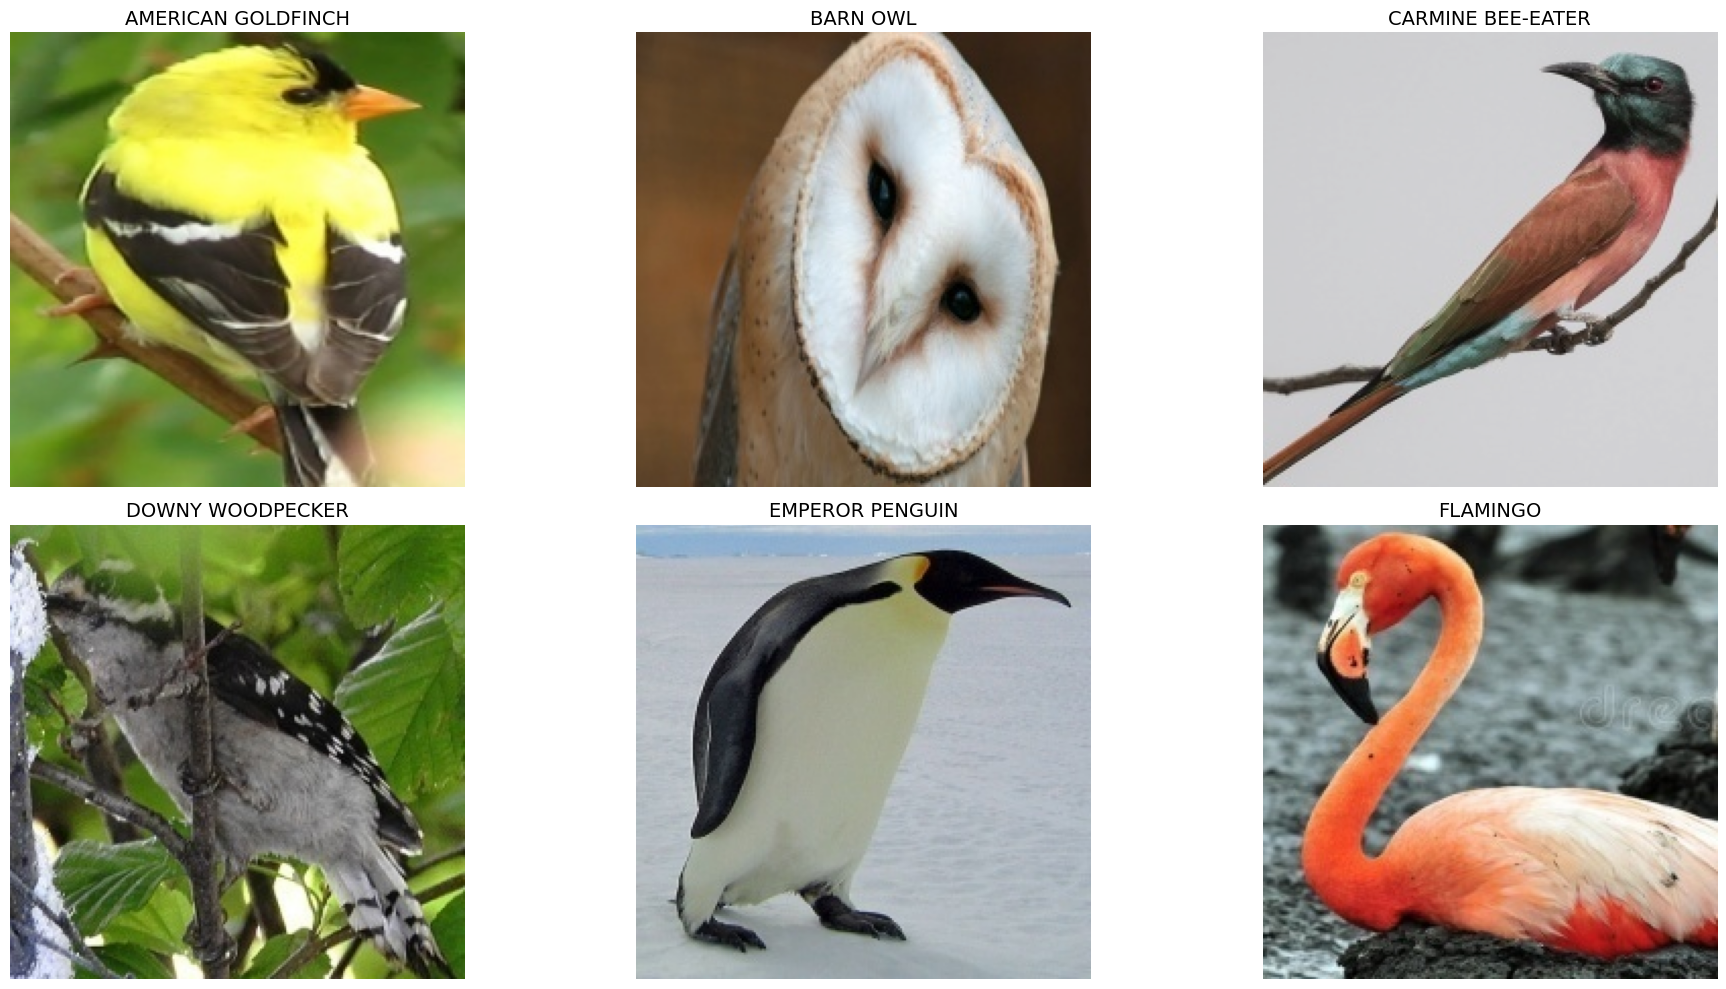

In [ ]:
# Visualizar imágenes aleatorias de entrenamiento por especie
import matplotlib.pyplot as plt
import numpy as np
import random

def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])  # Valores usados para normalizar
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean  # Desnormalizar
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title:
        plt.title(title, fontsize=14)
    plt.axis('off')
# Crear un diccionario que mapea cada clase a los índices de sus imágenes en el conjunto de entrenamiento
class_indices = {i: [] for i in range(len(class_names))}

# Construir el mapeo de clases a índices
for idx in range(len(train_dataset)):
    _, label = train_dataset[idx]
    class_indices[label].append(idx)

# Seleccionar una imagen aleatoria por especie
images = []
labels = []

for label in range(len(class_names)):
    indices = class_indices[label]
    random_idx = random.choice(indices)
    img, _ = train_dataset[random_idx]
    images.append(img)
    labels.append(label)

# Mostrar las imágenes con sus etiquetas
num_images = len(images)
plt.figure(figsize=(20, 10))

for i in range(num_images):
    plt.subplot(2, 3, i+1)  # harcodeamos las 6 clases, 2 filas y 3 columnas
    imshow(images[i], title=class_names[labels[i]])

plt.tight_layout()
plt.show()


**El Kernel (Filtro):** Permite resaltar ciertas propiedades de la imagen, como bordes, texturas o patrones específicos.


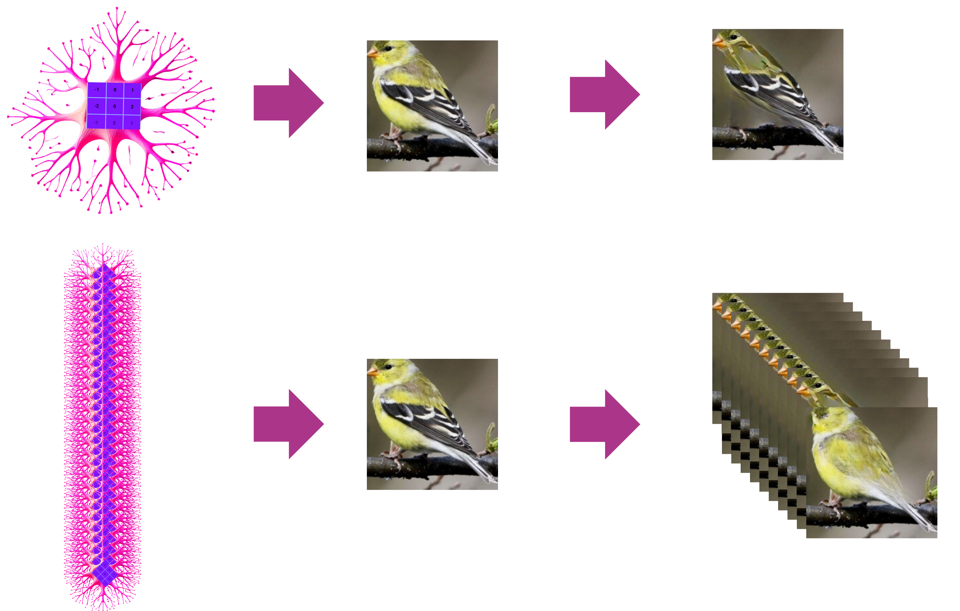

## Definamos la arquitectura:

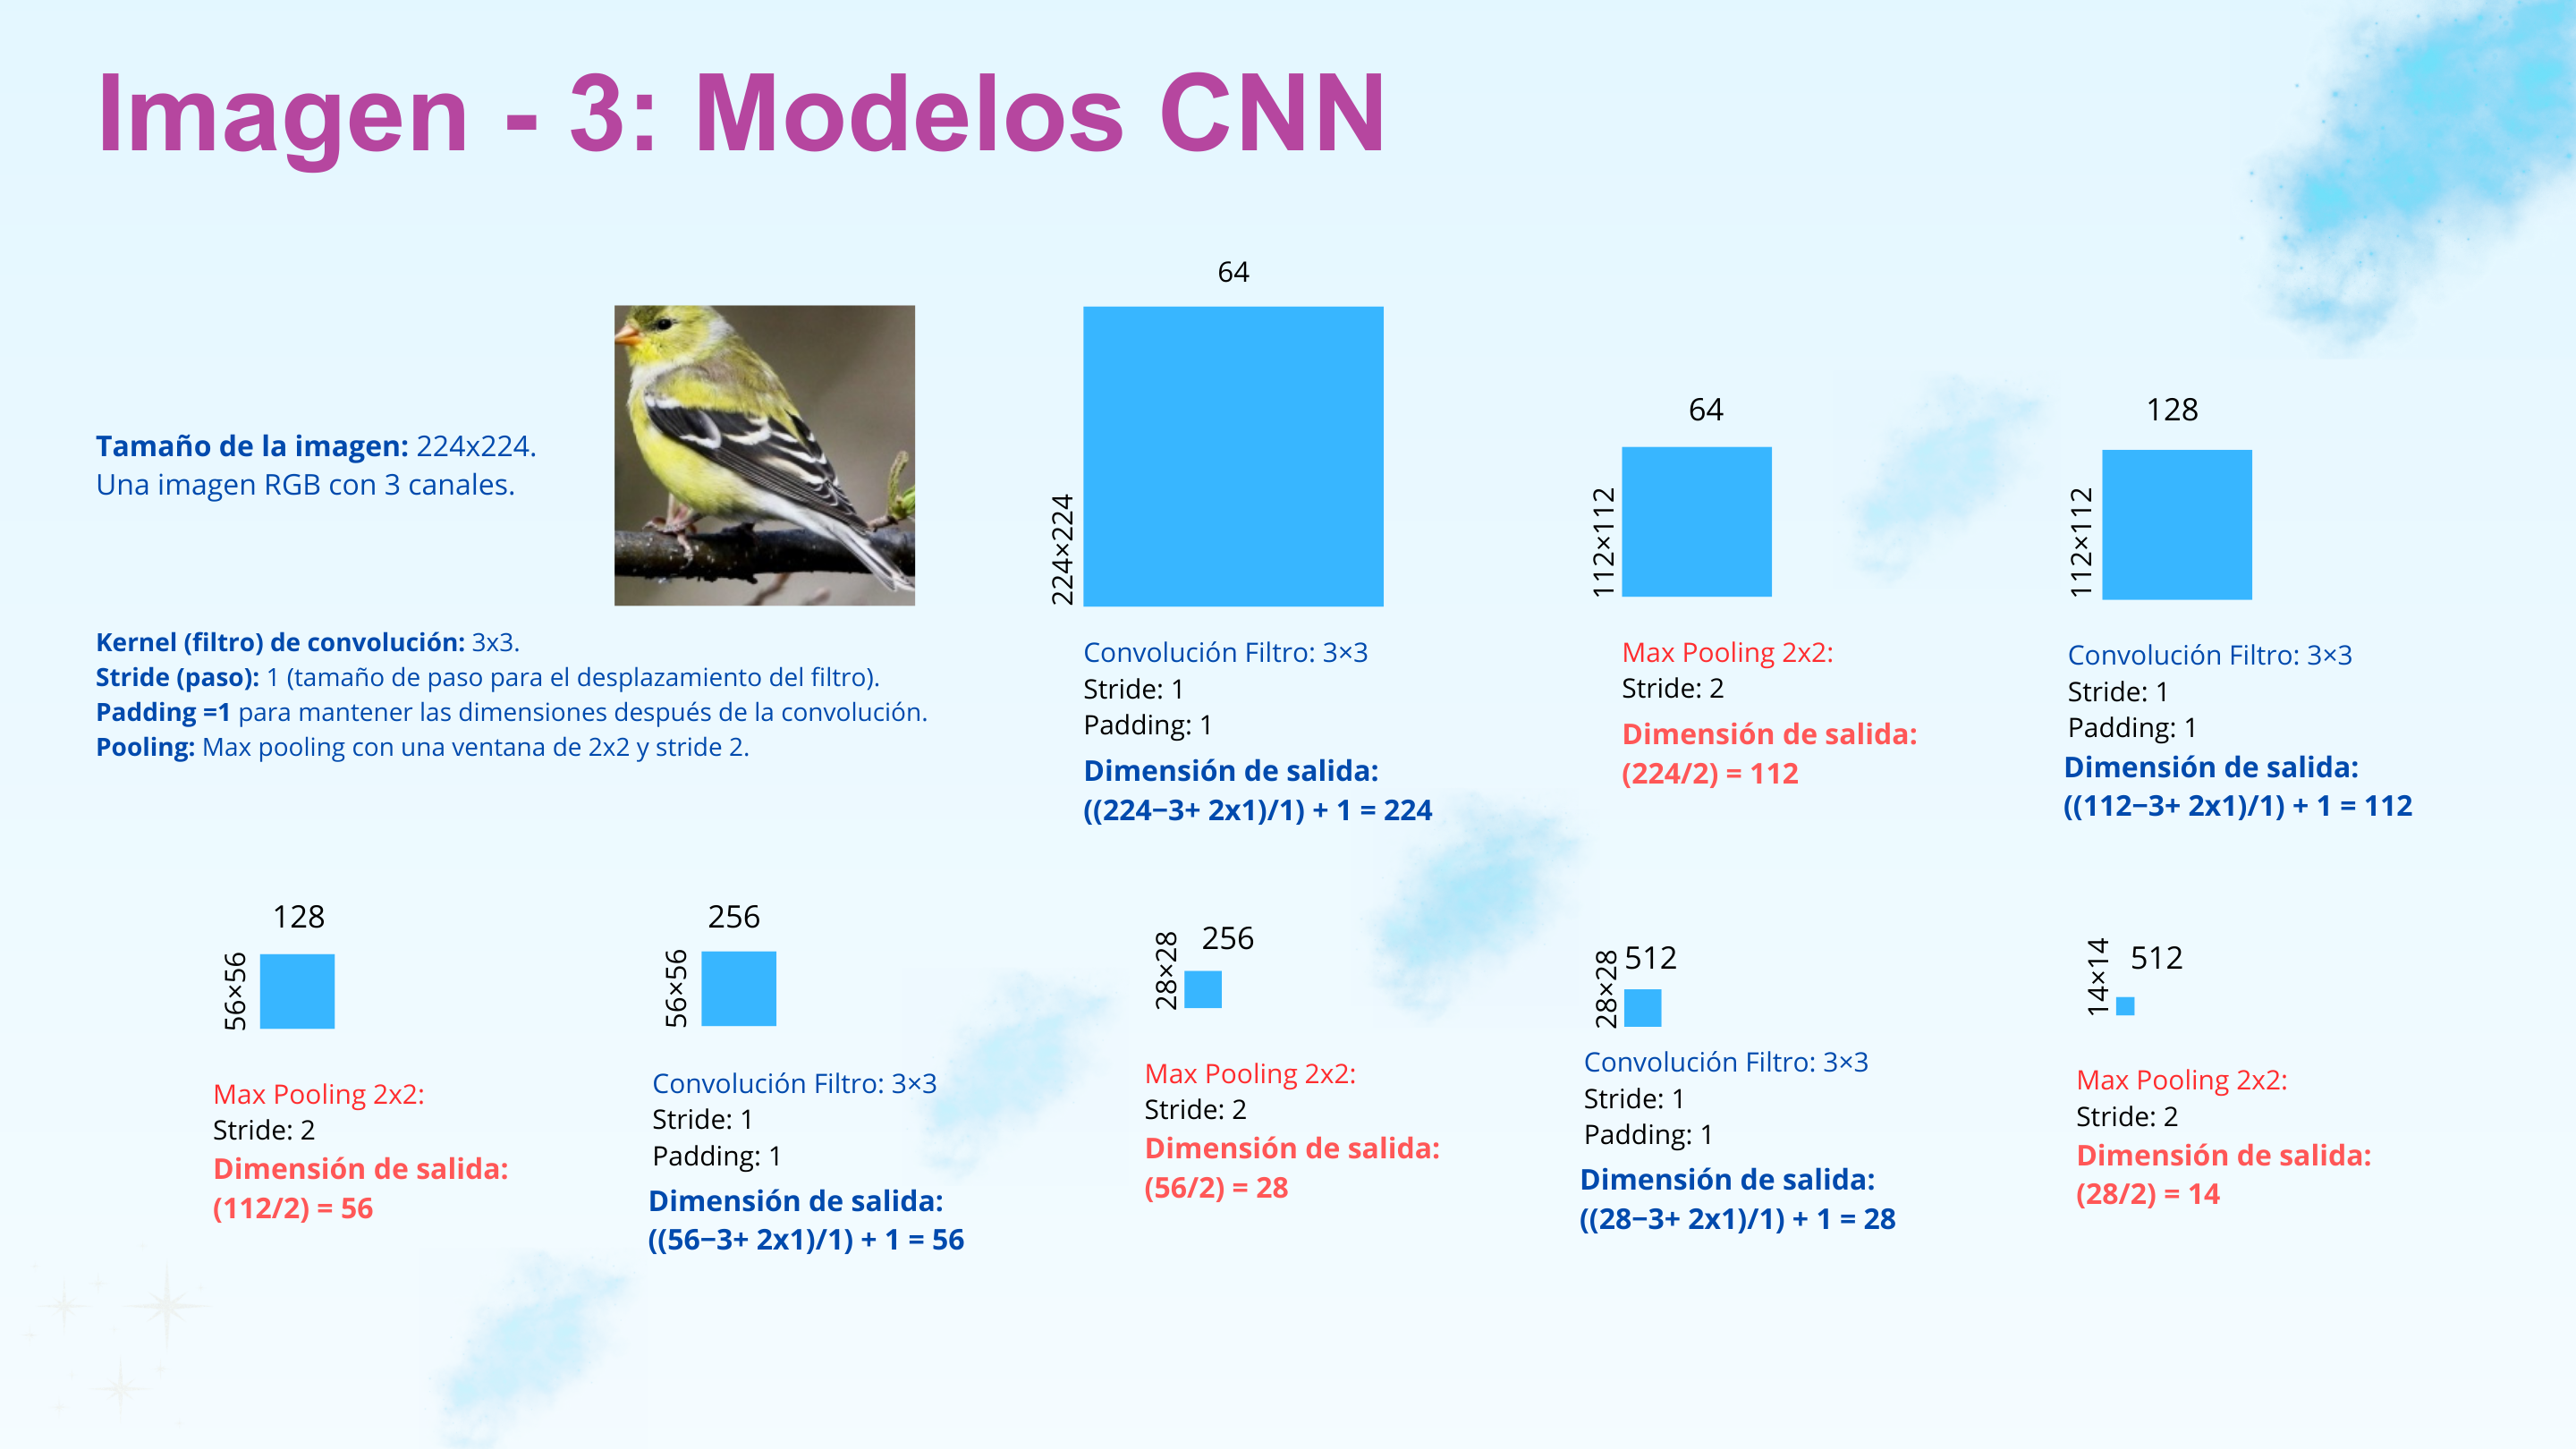

# Les dejamos 2 modelos

ToDo:

Corran el Modelo 1 - Entren - verifiquen salida

Corran el Modelo 2 - Entren - comparen salida con el anterior modelo 1

Modifiquen hiperparametros


# Modelo 1


In [ ]:
import torch
import torch.nn as nn

# Definir el modelo CNN con las dimensiones calculadas
class CNNModel(nn.Module):
    def __init__(self, num_classes=6):
        super(CNNModel, self).__init__()
        self.features = nn.Sequential(
            # Primera capa de convolución y pooling
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # (224x224) -> (224x224)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (224x224) -> (112x112)

            # Segunda capa de convolución y pooling
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # (112x112) -> (112x112)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (112x112) -> (56x56)

            # Tercera capa de convolución y pooling
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),  # (56x56) -> (56x56)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (56x56) -> (28x28)

            # Cuarta capa de convolución y pooling
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),  # (28x28) -> (28x28)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # (28x28) -> (14x14)
        )

        # La capa Linear se ajustará después de verificar las dimensiones reales
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),  # Regularización para evitar sobreajuste
            nn.Linear(512 * 14 * 14, 512),  # Aplanar y conectar a una capa totalmente conectada
            nn.ReLU(inplace=True),
            # ejemplo con mas capas
            # Segunda capa fully connected agregada (512 a 256)
            #nn.Linear(512, 256),
            #nn.ReLU(inplace=True),

            # Tercera capa fully connected agregada (256 a 128)
            #nn.Linear(256, 128),
            #nn.ReLU(inplace=True),

            # Capa final que conecta 128 neuronas con el número de clases (6)
            #nn.Linear(128, num_classes)  # Capa de salida con activación lineal

            nn.Linear(512, num_classes)  # Capa de salida con activación lineal
        )

    def forward(self, x):
        x = self.features(x)
        #print(x.shape)  # Verificar el tamaño del tensor después de las capas convolucionales y de pooling
        x = x.view(x.size(0), -1)  # Aplanar el tensor (flatten)
        x = self.classifier(x)
        #print(x.shape)
        return x

# Crear una instancia del modelo
model = CNNModel(num_classes=6)

# Simular una imagen de entrada de 224x224 con 3 canales (RGB)
input_image = torch.randn(1, 3, 224, 224)

# Pasar la imagen por el modelo
output = model(input_image)
print(output.shape)  # Debe ser torch.Size([1, 6])

print("Modelo 1 listo!!!")

torch.Size([1, 6])
Modelo 1 listo!!!


# Modelo 2

In [ ]:
import torch
import torch.nn as nn

# Definir el modelo CNN modificado con Batch Normalization
class CNNModelModificado(nn.Module):
    def __init__(self, num_classes=6):
        super(CNNModelModificado, self).__init__()
        self.features = nn.Sequential(
            # Primera capa de convolución con Batch Normalization
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),  # Añadir Batch Normalization
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Segunda capa de convolución con Batch Normalization
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),  # Añadir Batch Normalization
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Tercera capa de convolución con Batch Normalization
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),  # Añadir Batch Normalization
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Cuarta capa simplificada sin Batch Normalization
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Clasificador modificado sin capas intermedias
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),  # Regularización
            nn.Linear(512 * 14 * 14, num_classes)  # Simplificación de capas fully connected
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Crear una instancia del modelo
model2= CNNModelModificado(num_classes=6)

# Simular una imagen de entrada de 224x224 con 3 canales (RGB)
input_image = torch.randn(1, 3, 224, 224)

# Pasar la imagen por el modelo
output = model2(input_image)
print(output.shape)  # Debe ser torch.Size([1, 6])
print("Modelo 2 listo !!!")

torch.Size([1, 6])
Modelo 2 listo !!!


### Complementario: Pueden probar simplificando la red

```python
# ejemplo solo 2 capas
#....
    # Primera capa de convolución con Batch Normalization
    nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
    #....
    nn.MaxPool2d(kernel_size=2, stride=2),  # (224x224) -> (112x112)

    # Segunda capa de convolución con Batch Normalization
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    #....
    nn.MaxPool2d(kernel_size=2, stride=2)  # (112x112) -> (56x56)

# Clasificador ajustado
self.classifier = nn.Sequential(
    nn.Dropout(0.5),  
    nn.Linear(128 * 56 * 56, num_classes)  # Ajustar las dimensiones de entrada
)
#....


# Entranemiento

In [ ]:
import time
import torch

def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=25, patience=20):
    best_val_loss = float('inf')
    epochs_no_improve = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    start_time = time.time()

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Entrenamiento
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        print(f'Pérdida de entrenamiento: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validación
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                val_running_corrects += torch.sum(preds == labels.data)

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_running_corrects.double() / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc.item())

        print(f'Pérdida de validación: {val_loss:.4f} Acc: {val_acc:.4f}\n')

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0  # Resetear el contador si hay mejora
        else:
            epochs_no_improve += 1  # Incrementar el contador si no hay mejora

        if epochs_no_improve >= patience:
            print("Early Stopping activado. Entrenamiento detenido en la época", epoch + 1)
            break

    end_time = time.time()
    total_time = end_time - start_time
    print(f'Tiempo total de entrenamiento: {total_time:.2f} segundos')

    return train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
import matplotlib.pyplot as plt

def graficar(train_accuracies, val_accuracies, train_losses, val_losses):
    # Verificar que epochs_range coincida con el número de épocas reales entrenadas
    epochs_range = range(len(train_accuracies))  # Se ajusta al número de épocas ejecutadas

    plt.figure(figsize=(12, 4))

    # Gráfico de precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_accuracies, label='Precisión de entrenamiento')
    plt.plot(epochs_range, val_accuracies, label='Precisión de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend(loc='lower right')
    plt.title('Precisión de entrenamiento y validación')

    # Gráfico de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_losses, label='Pérdida de entrenamiento')
    plt.plot(epochs_range, val_losses, label='Pérdida de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend(loc='upper right')
    plt.title('Pérdida de entrenamiento y validación')

    plt.tight_layout()  # Ajusta el espaciado de la figura
    plt.show()


Usando el dispositivo: cuda:0
Epoch 1/25
----------
Pérdida de entrenamiento: 1.6198 Acc: 0.3904
Pérdida de validación: 1.2725 Acc: 0.5951

Epoch 2/25
----------
Pérdida de entrenamiento: 0.6514 Acc: 0.7515
Pérdida de validación: 0.6514 Acc: 0.7669

Epoch 3/25
----------
Pérdida de entrenamiento: 0.3577 Acc: 0.8719
Pérdida de validación: 0.4438 Acc: 0.8528

Epoch 4/25
----------
Pérdida de entrenamiento: 0.2069 Acc: 0.9275
Pérdida de validación: 0.4487 Acc: 0.8589

Epoch 5/25
----------
Pérdida de entrenamiento: 0.1437 Acc: 0.9475
Pérdida de validación: 0.5509 Acc: 0.8466

Epoch 6/25
----------
Pérdida de entrenamiento: 0.1125 Acc: 0.9614
Pérdida de validación: 0.4168 Acc: 0.8957

Epoch 7/25
----------
Pérdida de entrenamiento: 0.1564 Acc: 0.9491
Pérdida de validación: 0.6394 Acc: 0.8589

Epoch 8/25
----------
Pérdida de entrenamiento: 0.1019 Acc: 0.9583
Pérdida de validación: 0.5064 Acc: 0.8834

Epoch 9/25
----------
Pérdida de entrenamiento: 0.1734 Acc: 0.9491
Pérdida de validación: 

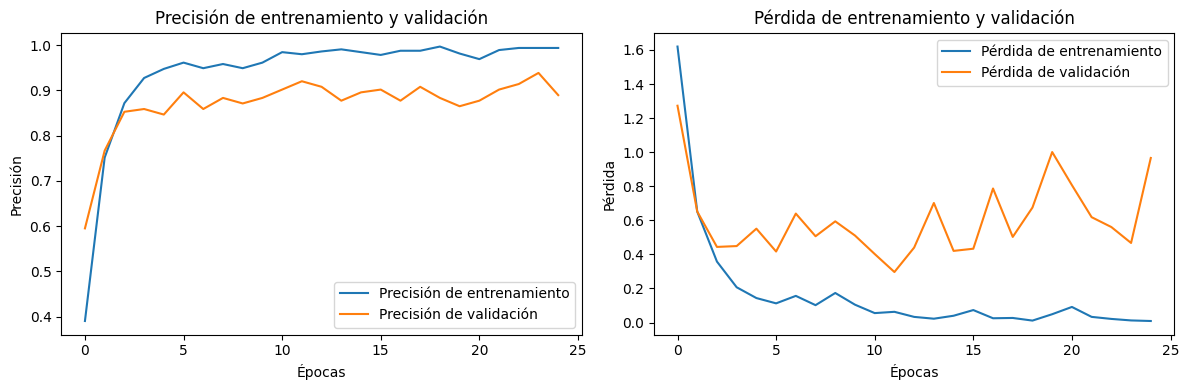

In [ ]:
### modelo 1

print("Entrenando Modelo 1 !!!")

# Definir el dispositivo
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Usando el dispositivo:", device)
model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=25,
    patience=20
)
graficar(train_accuracies, val_accuracies, train_losses, val_losses)


Usando el dispositivo: cuda:0
Epoch 1/25
----------
Pérdida de entrenamiento: 2.7327 Acc: 0.5015
Pérdida de validación: 1.0683 Acc: 0.7178

Epoch 2/25
----------
Pérdida de entrenamiento: 0.6435 Acc: 0.7793
Pérdida de validación: 0.6390 Acc: 0.8344

Epoch 3/25
----------
Pérdida de entrenamiento: 0.4086 Acc: 0.8642
Pérdida de validación: 0.4473 Acc: 0.8712

Epoch 4/25
----------
Pérdida de entrenamiento: 0.2856 Acc: 0.8981
Pérdida de validación: 0.5583 Acc: 0.8650

Epoch 5/25
----------
Pérdida de entrenamiento: 0.2508 Acc: 0.9136
Pérdida de validación: 0.4607 Acc: 0.8834

Epoch 6/25
----------
Pérdida de entrenamiento: 0.2025 Acc: 0.9290
Pérdida de validación: 0.7321 Acc: 0.8221

Epoch 7/25
----------
Pérdida de entrenamiento: 0.1727 Acc: 0.9491
Pérdida de validación: 0.4093 Acc: 0.8957

Epoch 8/25
----------
Pérdida de entrenamiento: 0.1294 Acc: 0.9491
Pérdida de validación: 0.4462 Acc: 0.8773

Epoch 9/25
----------
Pérdida de entrenamiento: 0.1606 Acc: 0.9475
Pérdida de validación: 

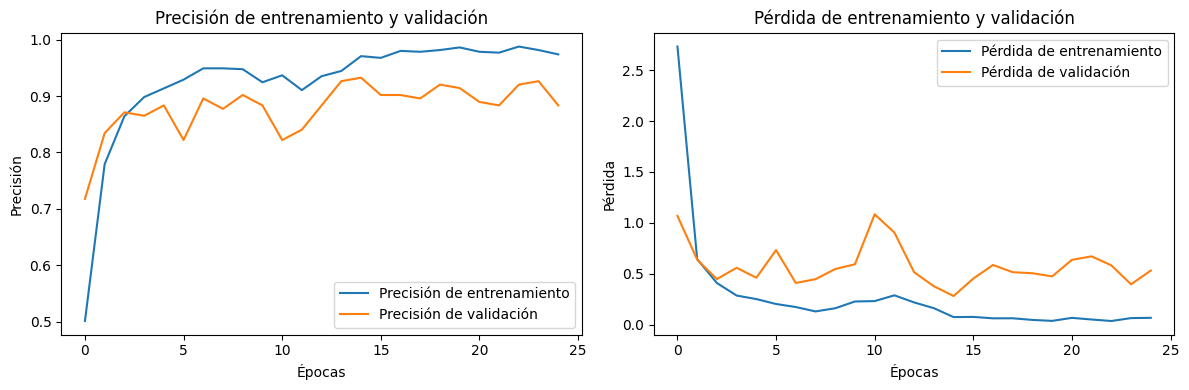

In [ ]:
### modelo 2

print("Entrenando Modelo 2 !!!")

# Definir el dispositivo
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Usando el dispositivo:", device)
model2.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model=model2,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=25,
    patience=20
)
graficar(train_accuracies, val_accuracies, train_losses, val_losses)


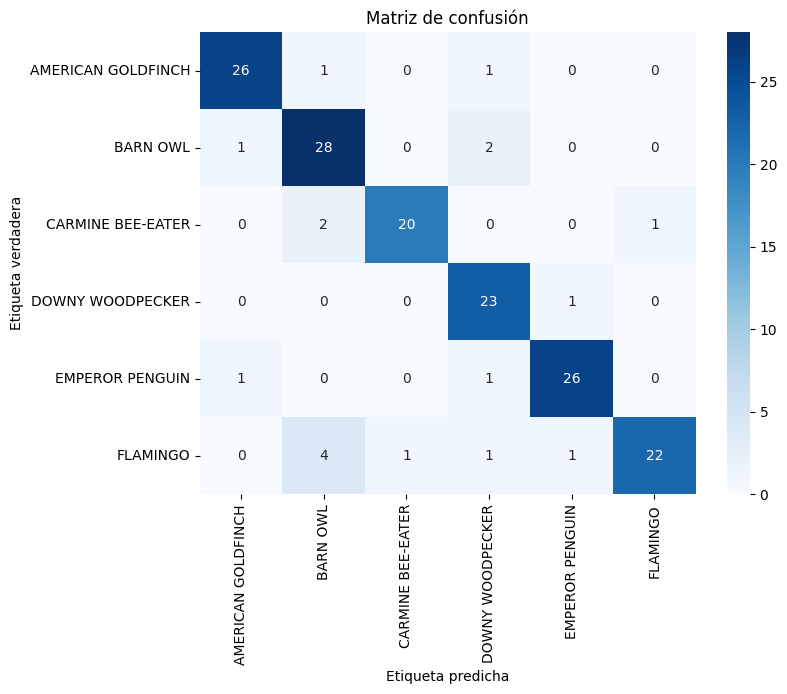

In [ ]:
# matriz de confusión
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# modo de evaluación
model.eval()

# Listas para almacenar las etiquetas verdaderas y las predicciones
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generar la matriz de confusión
cm = confusion_matrix(all_labels, all_preds)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de confusión')
plt.show()


# Complementario

### Explicación del Modelo VGG-16

VGG-16 es una arquitectura de red neuronal convolucional (CNN) diseñada por el Visual Geometry Group (VGG) de la Universidad de Oxford en 2014. La principal característica de VGG-16 es su **profundidad**: está compuesta por 16 capas (de ahí el nombre VGG-16), incluyendo capas convolucionales y fully connected (totalmente conectadas).

En VGG-16, se utilizan **filtros pequeños de 3x3** en las capas convolucionales, lo que permite capturar características locales de las imágenes. Este diseño ha demostrado ser muy efectivo en tareas de clasificación de imágenes.

En este proyecto, estamos utilizando el modelo **preentrenado en ImageNet** que proporciona PyTorch a través de `torchvision.models`. Es decir el modelo ya ha aprendido a reconocer características generales en un gran conjunto de datos de imágenes, lo que nos permite **aprovechar ese conocimiento previo** (transfer learning) y adaptarlo a nuestro propio conjunto de datos.



Epoch 1/25
----------
Pérdida de entrenamiento: 0.5458 Acc: 0.9043
Pérdida de validación: 0.0910 Acc: 0.9816

Epoch 2/25
----------
Pérdida de entrenamiento: 0.5209 Acc: 0.9738
Pérdida de validación: 3.3014 Acc: 0.8528

Epoch 3/25
----------
Pérdida de entrenamiento: 0.6444 Acc: 0.9799
Pérdida de validación: 0.2877 Acc: 0.9877

Epoch 4/25
----------
Pérdida de entrenamiento: 0.1785 Acc: 0.9892
Pérdida de validación: 0.3363 Acc: 0.9939

Epoch 5/25
----------
Pérdida de entrenamiento: 0.3626 Acc: 0.9861
Pérdida de validación: 0.1947 Acc: 0.9939

Epoch 6/25
----------
Pérdida de entrenamiento: 0.6890 Acc: 0.9907
Pérdida de validación: 1.1344 Acc: 0.9877

Epoch 7/25
----------
Pérdida de entrenamiento: 0.4715 Acc: 0.9923
Pérdida de validación: 3.6908 Acc: 0.9571

Epoch 8/25
----------
Pérdida de entrenamiento: 0.7291 Acc: 0.9815
Pérdida de validación: 7.0274 Acc: 0.9448

Epoch 9/25
----------
Pérdida de entrenamiento: 1.1050 Acc: 0.9907
Pérdida de validación: 4.7884 Acc: 0.9509

Epoch 10/2

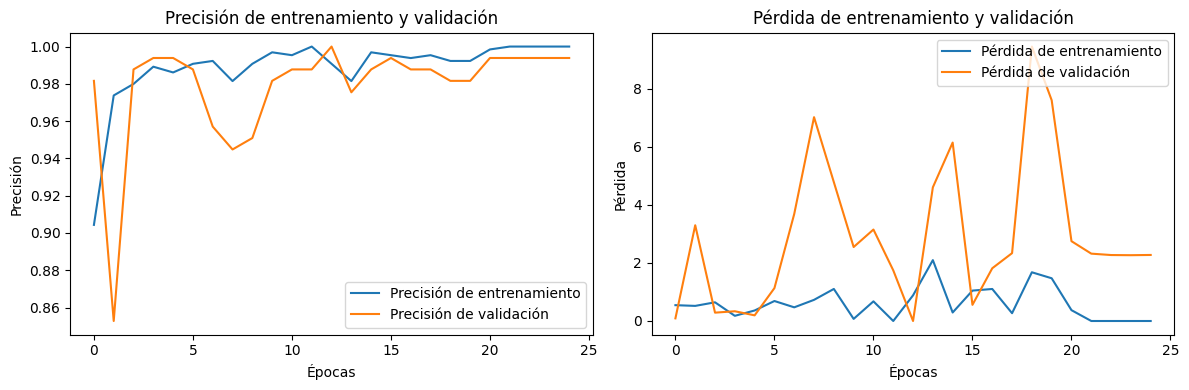

In [ ]:
import torch
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn

# 1. Cargar el modelo VGG-16 preentrenado en ImageNet
vgg16 = models.vgg16(pretrained=True)

# 2. Modificar la última capa fully connected para 6 clases
num_classes = 6
vgg16.classifier[6] = nn.Linear(4096, num_classes)  # Cambia la última capa para clasificación en 6 clases

# 3. Congelar las capas convolucionales (opcional) # vgg16.features[:2]
for param in vgg16.features.parameters():
    param.requires_grad = False

#vgg16.classifier[2] = nn.Dropout(0.7) # Aumentar Dropout en el clasificador

# 4. Configurar el dispositivo (GPU o CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)

# 5. Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.001)

# 6. Entrenar el modelo usando la función `train_model`
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model=vgg16,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=25,
    patience=20
)

# 7. Graficar las curvas de pérdida y precisión
graficar(train_accuracies, val_accuracies, train_losses, val_losses)

### TODO: Mejora el modelo ajustando los hiperparametros

Preguntas:

1. **¿Cómo afecta la eliminación de capas fully connected en el segundo modelo al rendimiento y a la capacidad de generalización del modelo? ¿Qué diferencias observas en comparación con el primer modelo que tiene más capas?**

2. **En el segundo modelo, se agregó Batch Normalization en las capas convolucionales. ¿Qué impacto tiene esta técnica en la precisión y estabilidad del entrenamiento en comparación con el primer modelo? ¿Por qué podría ser útil?**

3. **¿Qué sucede al entrenar el modelo con diferentes inicializaciones de pesos? ¿Observas alguna diferencia significativa en la precisión o pérdida entre los dos modelos? ¿Por qué crees que ocurre esto?**

4. **¿Cómo influye el uso de Early Stopping en la cantidad de épocas entrenadas y en la generalización del modelo? ¿Qué modelo se beneficia más de esta técnica y por qué?**  

5. **¿Qué nos indica la matriz de confusión sobre el rendimiento del modelo? ¿Existen clases que se confundan más entre sí? ¿Qué cambios harías en el modelo para mejorar esta métrica?**